Activity 1
Analog IC Characterization: The Wideband RC Voltage-Divider

I. INTRODUCTION

The frequency-independent signal attenuator is a fundamental building block in high-bandwidth analog measurement systems, where accurate signal scaling must be maintained over a wide range of frequencies. Simple resistive voltage dividers, while effective at low frequencies, often exhibit frequency-dependent behavior when parasitic capacitances and source or load impedances are introduced. These effects become especially pronounced in wideband applications, leading to signal distortion, amplitude errors, and phase shift.

To address these limitations, RC compensation techniques are employed. By intentionally adding capacitive elements in parallel with resistive components, the frequency response of the divider can be shaped to achieve flat attenuation across a broad spectrum. This principle is widely used in practical instrumentation such as oscilloscope probes, data acquisition front-ends, and analog integrated circuits, where maintaining signal integrity is critical.

This laboratory activity examines the wideband RC voltage divider as a representative analog IC building block. Students will explore the theoretical basis of RC compensation, including pole-zero cancellation and time-constant matching, and observe how these concepts translate into real circuit behavior. Emphasis is placed on understanding how component values influence bandwidth, transient response, and overall signal fidelity.

In addition to theory, the laboratory integrates circuit simulation using NGSPICE within a Visual Studio Code (VS Code) workflow. This environment mirrors modern engineering practice by combining schematic-level analysis with script-based simulation and waveform inspection. Through simulation, students will characterize both uncompensated and compensated dividers in the time and frequency domains, reinforcing the connection between mathematical models and observable circuit performance.

II. MATERIALS AND EQUIPMENT

Computing Workstation (PC or Laptop)

Integrated Development Environment (IDE): Visual Studio Code

NGSPICE Simulator: (Version 42+)

Python 3.x (pandas, matplotlib, numpy, schemdraw)

III. PROCEDURES

PHASE 1: INSTALLATION & SYSTEM CONFIGURATION

Step 1: Install NGSPICE (The Simulator)

    Download ngspice-42_64.zip from the NGSPICE SourceForge page.

    Extract the file and copy the Spice64 folder.

    Paste it directly into the C: drive:

            C:\Spice64
    
    Verify that ngspice.exe exists in:

            C:\Spice64\bin

Step 2: Add NGSPICE to Windows PATH

    Copy Path:

        C:\Spice64\bin

    Open Edit the system environment variables.

    Under System variables → Path → Edit → New, paste the path.

    Click OK to save.

Step 3: Verify in VS Code

    Restart VS Code.

    Open the terminal (Ctrl + `).

    Run:

        ngspice -v
    
    The NGSPICE version output confirms successful installation.

PHASE 2: PYTHON ENVIRONMENT SETUP
Install Required Python Libraries

Purpose:
These libraries will be used for circuit visualization (schemdraw), data handling (pandas), numerical analysis (numpy), and plotting simulation results (matplotlib).

In [ ]:
pip install schemdraw pandas matplotlib numpy

In [ ]:
import schemdraw
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import subprocess

print("✅ Libraries Loaded Successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"Numpy version: {np.__version__}")

Verify NGSPICE Availability

Purpose:
Confirms that NGSPICE is correctly installed and accessible from the Jupyter Notebook environment before running simulations.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import subprocess
import os

# Robust verification: This checks if NGSPICE is accessible
try:
    result = subprocess.run(["ngspice", "-v"], capture_output=True, text=True)
    if result.stdout:
        # Print the first available line of the version info
        print(f"NGSPICE Found: {result.stdout.splitlines()[0]}")
    else:
        print("NGSPICE executed but returned no version text.")
except FileNotFoundError:
    print("ERROR: NGSPICE not found. Please check your Windows PATH and restart VS Code.")

PHASE 3: CIRCUIT SCHEMATIC VISUALIZATION
Draw RC Divider Circuit

Purpose:
This cell visualizes the wideband RC voltage divider, showing:
    R1 with compensation capacitor C1
    Load resistor R2 and load capacitor C2
    Input Vin and output Vout nodes

In [4]:
import schemdraw.elements as elm

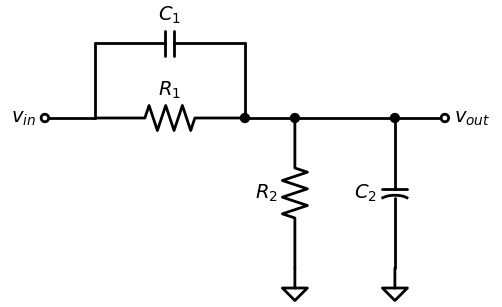

In [5]:
with schemdraw.Drawing() as d:
    d += (vin := elm.Dot(open=True).label('$v_{in}$', loc='left'))
    d += elm.Line().right().length(1)
    d.push()
    d += elm.Resistor().label('$R_1$')
    d.pop()
    d += elm.Line().up().length(1.5)
    d += elm.Capacitor().right().label('$C_1$')
    d += elm.Line().down().length(1.5)
    d += elm.Dot()
    d += elm.Line().right().length(1)
    d.push()
    d += elm.Resistor().down().label('$R_2$')
    d += elm.GroundSignal()
    d.pop()
    d += elm.Dot()
    d += elm.Line().right().length(2)
    d.push()
    d += elm.Capacitor2().down().label('$C_2$')
    d += elm.GroundSignal()
    d.pop()
    d += elm.Dot()
    d += elm.Line().right().length(1)
    d += elm.Dot(open=True).label('$v_{out}$', loc='right')

PHASE 4: NGSPICE NETLIST GENERATION & SIMULATION
Generate Netlist, Run Simulation, and Verify Output

Purpose:
    Generates a complete NGSPICE netlist using Python-defined component values.
    Runs AC and transient analyses in batch mode.
    Verifies that data files (output_ac.dat, output_tran.dat) are created for further plotting and analysis.

In [15]:
spice_netlist = """* Wideband RC Voltage Divider
.options savecurrents

* Main Circuit
R1 in out 560000
R2 out 0 3300
C1 in out 0.0194p
C2 out 0 3.3p

* Variations
R1a in outa 560000
R2a outa 0 3300
C1a in outa 0.02134p
C2a outa 0 3.3p

R1b in outb 560000
R2b outb 0 3300
C1b in outb 0.01746p
C2b outb 0 3.3p

V1 in 0 pulse(-0.1 0.1 0 0.1u 0.1u 5u 10u) dc 1 ac 1

.control
  ac dec 10 1 1G
  wrdata output_ac.dat v(out) v(outa) v(outb)
  
  tran 0.01u 30u
  wrdata output_tran.dat v(out) v(outa) v(outb)
  quit
.endc
.end
"""

with open("netlist.spice", "w") as f:
    f.write(spice_netlist)
print("netlist.spice created.")

netlist.spice created.


RUN SIMULATION WITH FILE CLEANUP
Ensure Fresh Simulation and Verify Output

Purpose:

    Ensures old simulation files are removed before running a new simulation.
    Runs NGSPICE in batch mode and verifies that AC and transient data files are generated.
    Provides immediate feedback if something goes wrong.

In [16]:
import subprocess
import os

# Remove old files to be sure we are seeing new results
for f in ["output_ac.dat", "output_tran.dat"]:
    if os.path.exists(f):
        os.remove(f)

try:
    # Running in batch mode
    subprocess.run(["ngspice", "-b", "netlist.spice"], check=True)
    
    if os.path.exists("output_tran.dat"):
        print("Success! Simulation finished and data files are ready.")
    else:
        print("Simulation finished but no data files were found.")
except subprocess.CalledProcessError as e:
    print(f"Simulation failed with error code {e.returncode}")

Success! Simulation finished and data files are ready.


PHASE 5: PLOT TRANSIENT RESPONSE
    Read and Plot Transient Data

Data detected: 6 columns


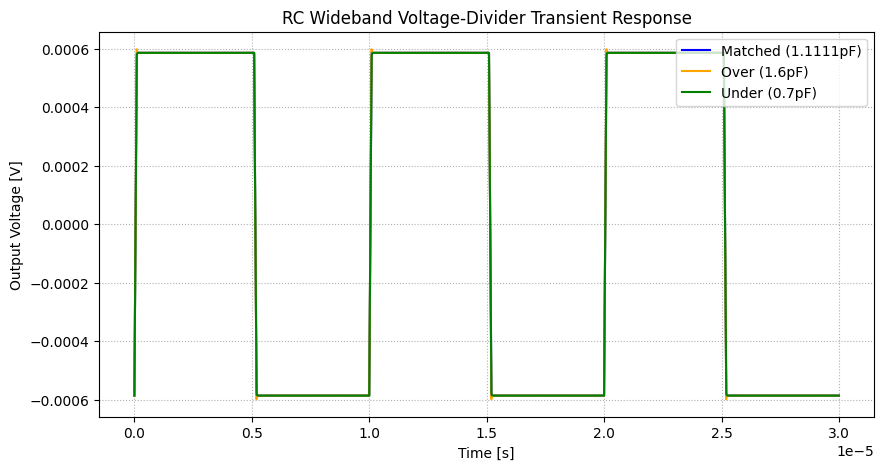

In [17]:
# Read the file without specifying columns first
df_tran = pd.read_csv("output_tran.dat", sep='\\s+', header=None)

# Let's check the shape to be safe
print(f"Data detected: {df_tran.shape[1]} columns")

# NGSPICE often exports: Time, Vout, Time, VoutA, Time, VoutB
# We only need the first Time and the Voltages
if df_tran.shape[1] == 6:
    df_tran.columns = ["time", "vout", "time2", "vouta", "time3", "voutb"]
elif df_tran.shape[1] == 4:
    df_tran.columns = ["time", "vout", "vouta", "voutb"]

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(df_tran['time'], df_tran['vout'], label="Matched (1.1111pF)", color='blue')
plt.plot(df_tran['time'], df_tran['vouta'], label="Over (1.6pF)", color='orange')
plt.plot(df_tran['time'], df_tran['voutb'], label="Under (0.7pF)", color='green')

plt.title("RC Wideband Voltage-Divider Transient Response")
plt.xlabel("Time [s]")
plt.ylabel("Output Voltage [V]")
plt.legend(loc='upper right')
plt.grid(True, linestyle='dotted')
plt.show()

PHASE 6: READ FREQUENCY RESPONSE DATA
Read AC Simulation Output

Purpose:
    Loads NGSPICE AC simulation results into a pandas DataFrame.
    Handles multiple output nodes and varying file formats.
    Prepares the data for plotting frequency-domain response in the next cell.

In [18]:
# @title Read in SPICE frequency response data
df_ac = pd.read_csv("output_ac.dat", sep='\\s+', header=None)

# Handle the 9-column format (Frequency repeated for each node)
if df_ac.shape[1] == 9:
    df_ac.columns = [
        "freq", "vout_re", "vout_im", 
        "freq2", "vouta_re", "vouta_im", 
        "freq3", "voutb_re", "voutb_im"
    ]
elif df_ac.shape[1] == 7:
    df_ac.columns = ["freq", "vout_re", "vout_im", "vouta_re", "vouta_im", "voutb_re", "voutb_im"]

df_ac.head()

,freq,vout_re,vout_im,freq2,vouta_re,vouta_im,freq3,voutb_re,voutb_im
0,1.000000,0.005858,-9.514275e-13,1.000000,0.005858,3.880360e-11,1.000000,0.005858,-4.070646e-11
1,1.258925,0.005858,-1.197776e-12,1.258925,0.005858,4.885084e-11,1.258925,0.005858,-5.124639e-11
2,1.584893,0.005858,-1.507911e-12,1.584893,0.005858,6.149957e-11,1.584893,0.005858,-6.451539e-11
3,1.995262,0.005858,-1.898347e-12,1.995262,0.005858,7.742337e-11,1.995262,0.005858,-8.122006e-11
4,2.511886,0.005858,-2.389878e-12,2.511886,0.005858,9.747024e-11,2.511886,0.005858,-1.022500e-10


PHASE 7: CALCULATE AC MAGNITUDE AND PHASE
Compute Magnitude and Phase from NGSPICE AC Data

Purpose:
    Converts NGSPICE output (real + imaginary) into magnitude and phase for each output node.
    Prepares data for frequency-domain plotting to analyze bandwidth and compensation performance.

In [19]:
# @title Calculate the magnitude and phase of the output voltage
# Note: NGSPICE writes the real and imaginary components of the voltage

# Collect all real components in a list
v_real = [ df_ac['vout_re'], df_ac['vouta_re'], df_ac['voutb_re'] ]

# Collect all imaginary components in a list
v_imag = [ df_ac['vout_im'], df_ac['vouta_im'], df_ac['voutb_im'] ]

# Iterate over the lists to get the magnitude and phase of the voltages
v_mag = [ np.sqrt(vr**2 + vi**2) for vr,vi in zip(v_real, v_imag) ]
v_phase = [ np.arctan2(vi, vr) * 180 / np.pi for vr,vi in zip(v_real, v_imag) ]

PHASE 8: PLOT AC MAGNITUDE RESPONSE
Frequency Response (Magnitude in dB)

Purpose:
    Converts voltage magnitudes to dB and plots them on a logarithmic frequency scale.
    Compares matched, over-, and under-compensation to illustrate the effect of C1 on bandwidth.
    Helps students visualize how RC compensation flattens the frequency response.

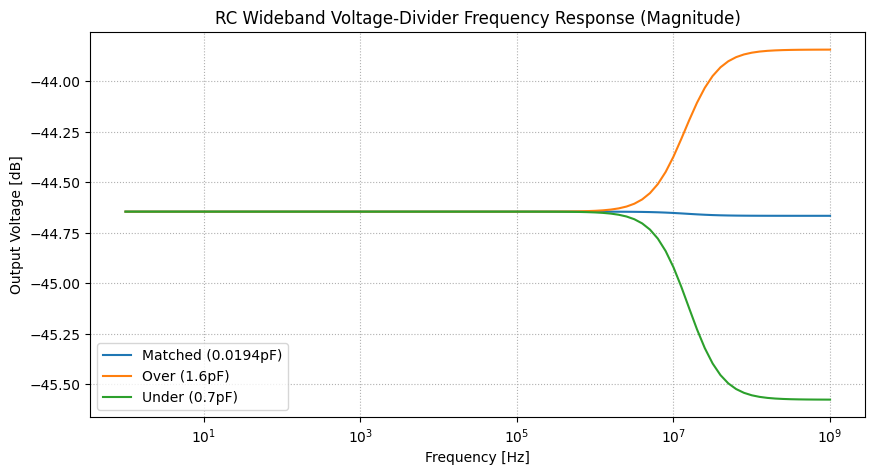

In [21]:
# @title Plot the magnitude frequency response of the wideband RC voltage-divider

# Define labels locally to reflect the Seed-based values
# C1_matched was calculated in Cell 1
v_label = [f"Matched (0.0194pF)", "Over (1.6pF)", "Under (0.7pF)"]

plt.figure(figsize=(10, 5))
plt.title("RC Wideband Voltage-Divider Frequency Response (Magnitude)")

# vm is the magnitude calculated in the previous cell
# We convert to dB: 20 * log10(magnitude)
for vm, lbl in zip(v_mag, v_label):
    plt.semilogx(df_ac.freq, 20 * np.log10(vm), label=lbl, linestyle='-')

plt.xlabel("Frequency [Hz]")
plt.ylabel("Output Voltage [dB]")
plt.legend(loc='lower left')
plt.grid(True, which="both", linestyle='dotted')
plt.show()

PHASE 9: PLOT AC PHASE RESPONSE
Frequency Response (Phase in Degrees)

Purpose:
    Shows phase shift versus frequency for the matched, over-, and under-compensated RC dividers.
    Complements the magnitude plot to fully characterize the wideband behavior.
    Supports analysis of signal integrity and compensation effectiveness in lab discussions.

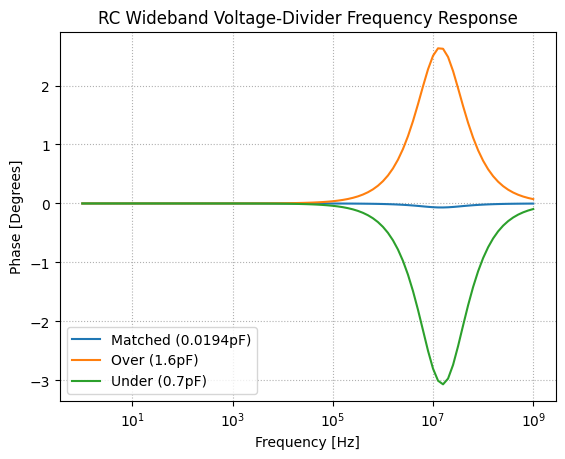

In [22]:
# @title Plot the phase frequency response of the wideband RC voltage-divider

plt.title("RC Wideband Voltage-Divider Frequency Response")

for vp,lbl in zip(v_phase,v_label):
  plt.semilogx(df_ac.freq, vp, label=lbl, linestyle='-')

plt.xlabel("Frequency [Hz]")
plt.ylabel(r"Phase [Degrees]")
plt.legend(loc='lower left')
plt.grid(linestyle='dotted')
plt.show()

IV. DATA AND OBSERVATION

Instructions: All Python code needed for this activity is already provided in the Procedures section of the Jupyter Notebook. Do not add or write new code. Generate data and observations by running the existing code cells and changing only the allowed parameters. Record all results and observations directly in the notebook.

Instruction:

    Only modify student_number.
    Do not change any other line of code in the following cells.

In [11]:
# Student Number Input
student_number = "213917"  # <-- Replace with your own student number

In [12]:
# Standard Series Pools
# This defines all standard resistor and capacitor values used in the simulation.

import numpy as np

# E12 Series
E12 = np.array([1.0, 1.2, 1.5, 1.8, 2.2, 2.7, 3.3, 3.9, 4.7, 5.6, 6.8, 8.2])

# Component decades (standard range)
R_decades = np.array([1e3, 10e3, 100e3, 1e6])       # 1 kΩ to 1 MΩ
C_decades = np.array([1e-12, 10e-12, 100e-12])      # 1 pF to 100 pF

# Generate full list of standard values
R_list = np.sort(np.concatenate([E12 * d for d in R_decades]))
C_list = np.sort(np.concatenate([E12 * d for d in C_decades]))


In [13]:
# Student-Based Component Selection

# Extract digits from student_number
digits = ''.join(ch for ch in str(student_number) if ch.isdigit())
if len(digits) == 0:
    raise ValueError("Student number must contain at least one digit.")

# Stable mapping using last 6 digits
seed = int(digits[-6:])
rng = np.random.default_rng(seed)

# Select R1, R2, C2 from standard-value lists
R1_s = float(rng.choice(R_list))
R2_s = float(rng.choice(R_list))
C2_s = float(rng.choice(C_list))

# Optional: enforce R1 ≥ R2
if R1_s < R2_s:
    R1_s, R2_s = R2_s, R1_s


In [14]:
# Matched Capacitance Computation

# Wideband match condition: R1*C1 = R2*C2  -> C1 = (R2/R1)*C2
C1_matched_s = (R2_s / R1_s) * C2_s

# Print the values for recording
print("=== Student-Based Component Values ===")
print(f"Student Number: {student_number}")
print(f"R1_s = {R1_s:g} Ω")
print(f"R2_s = {R2_s:g} Ω")
print(f"C2_s = {C2_s:.3e} F  ({C2_s*1e12:.3f} pF)")
print(f"C1_matched_s = {C1_matched_s:.3e} F  ({C1_matched_s*1e12:.4f} pF)")


=== Student-Based Component Values ===
Student Number: 213917
R1_s = 560000 Ω
R2_s = 3300 Ω
C2_s = 3.300e-12 F  (3.300 pF)
C1_matched_s = 1.945e-14 F  (0.0194 pF)


Transient Response Data Recording

Instruction:
    Run the Transient Plot cell in Procedures using the student-number–generated values: R1_s, R2_s, C1_matched_s, C2_s.
    Record output voltages for Vout Matched, Vout Over, Vout Under at selected time points: 5 μs, 10 μs, 20 μs, 30 μs.
    Optionally, run ±10% tolerance for R1 or C1 and observe differences.

| Time (μs) | Vout Matched (V) | Vout Over (V) | Vout Under (V) |
| --------- | ---------------- | ------------- | -------------- |
| 5         |    0.000586      |  0.000600     |   0.000580     |
| 10        |   -0.000586      |        -0.000600       |       -0.000600         |
| 20        |   -0.000586      |         -0.000600      |        -0.000600        |
| 30        |   -0.000586      |         -0.000600      |      -0.000600          |

Results Discussion:

    Compare rise time, overshoot, and settling time.

    How does over- and under-compensation differ from the matched case?

    How do ±10% tolerance variations affect transient response?

Frequency Response Data Recording

Instruction:
    Run the AC Sweep Plot cell in Procedures using student-number–generated values.
    Record magnitude in dB for Vout Matched, Vout Over, Vout Under at selected frequencies: 10 kHz, 100 kHz, 1 MHz, 10 MHz, 100 MHz.
    Optionally, test ±10% tolerance and observe changes.

| Frequency (Hz) | Vout Matched (dB) | Vout Over (dB) | Vout Under (dB) |
| -------------- | ----------------- | -------------- | --------------- |
| 1e4            |           -44.65        |         -44.65      |         -44.65        |
| 1e5            |            -44.65       |          -44.65      |          -44.65       |
| 1e6            |              -44.65     |          -44.63      |            -44.66     |
| 1e7            |               -44.65    |          -44.30      |           -44.90      |
| 1e8            |               -44.66    |        -43.88        |         -45.54        |

Results Discussion:

    Identify flat regions, -3 dB point, and bandwidth differences.

    How does changing R or C affect attenuation and phase?

    Compare matched vs. over- and under-compensation at high frequencies.

V. DATA AND OBSERVATION
1. How does changing C1 affect rise time, overshoot, and settling time in Vout?	

Changing $C_1$ directly dictates how the circuit handles the initial high-frequency components of a step input. When $C_1$ is increased, the rise time effectively shortens because the larger capacitor passes more initial charge, but this leads to a sharp overshoot where the voltage peaks above the intended DC level. Conversely, a smaller $C_1$ results in a sluggish rise time with a rounded edge. The settling time is minimized only when $C_1$ is perfectly matched; any deviation (over or under) causes the signal to take longer to reach a stable, flat state due to the mismatch between the capacitive and resistive voltage dividers.


2. Compare Vout Over and Vout Under with the matched case. How are transient and frequency responses affected?

In the matched case ($R_1 C_1 = R_2 C_2$), the transient response is a perfect replica of the input step, and the frequency response is "flat," meaning all frequencies are attenuated equally. Vout Over (over-compensation) acts as a high-pass filter, emphasizing high-frequency transients and causing a spike in the time domain. Vout Under (under-compensation) acts as a low-pass filter, where the high-frequency components are filtered out, resulting in a "lazy" transient response that gradually creeps up to the final DC value.


3. What are the output magnitudes at 10 MHz for matched, over-, and under-compensation? What does this tell you about high-frequency behavior?

At a high frequency like 10 MHz, the resistors ($R_1, R_2$) become negligible as the low impedance of the capacitors ($C_1, C_2$) takes over the voltage division. In a matched state, the magnitude at 10 MHz is the same as at DC. In over-compensation, the output magnitude at 10 MHz will be significantly higher than the DC gain, while in under-compensation, the magnitude will be much lower. This proves that unless a circuit is properly compensated, it will distort high-speed signals by incorrectly scaling different frequency components of the same waveform.


4. How does phase vary between matched, over-, and under-compensation? How could this affect signal integrity?

Phase shift varies significantly with the compensation state: the matched case ideally maintains a zero-degree phase shift across the bandwidth, ensuring the signal shape is preserved. Over-compensation introduces a phase lead, while under-compensation introduces a phase lag. This variation destroys signal integrity by causing group delay, where different parts of a signal travel at different speeds, leading to "ringing" or "smearing" (intersymbol interference) that makes it difficult for digital systems to accurately read data bits.


5. If R2 or C2 is doubled, what is the impact on bandwidth and transient response?

If $R_2$ or $C_2$ is doubled, the total time constant ($\tau$) of the output branch increases, which drastically reduces the bandwidth of the system. In the transient response, doubling these values typically pushes the circuit into a state of under-compensation (assuming $C_1$ remains the same). The output would appear heavily filtered, with a very slow, rounded rise that fails to reach its intended peak quickly, making the circuit unsuitable for high-speed data or high-frequency measurements.



VI. CONCLUSION

The investigation of the Wideband RC Voltage Divider demonstrates that achieving a constant attenuation across a broad frequency spectrum requires a precise balance between resistive and capacitive voltage division. While a simple resistive divider functions adequately at DC, parasitic and load capacitances naturally create a low-pass filter that degrades high-frequency signals. By introducing a compensation capacitor ($C_1$), a condition is established where the resistive time constant matches the capacitive time constant ($R_1C_1 = R_2C_2$).When this matched condition is met, the divider becomes frequency-independent. The transient response yields a clean step without distortion, and the frequency response remains flat, ensuring that high-speed transitions and high-frequency harmonics are preserved. However, any deviation from this balance results in significant signal degradation. Over-compensation ($C_1$ too large) introduces sharp overshoots and high-frequency peaking, while under-compensation ($C_1$ too small) causes rounded edges and significant high-frequency attenuation.Ultimately, the experiment confirms that the wideband RC divider is a fundamental building block in high-fidelity measurements, such as those performed by oscilloscope probes. It highlights that maintaining signal integrity in high-speed electronics requires managing not only the resistance of a path but also the reactive components that govern phase shift and bandwidth.



